In [20]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from scipy.optimize import minimize
from sklearn.cross_validation import train_test_split

class AdaptiveNeaurons(object):
    
    def __init__(self, eta, n_iter):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        # Initialize theta 
        initial_theta = np.zeros((X.shape[1], 1))
        
        # Compute linear activation
        J_cost = self.activation(X, y, initial_theta)
        # Short hand for cost function to be minimized
        def costFunc(theta):
            return self.activation(X, y, theta, True)

        # Gradient descent 
        results = minimize(costFunc, x0=initial_theta, options={'disp': True, 'maxiter':self.n_iter}, method="L-BFGS-B", jac=True)
        theta = results["x"]
        return theta
        
    
    def activation(self, X, y, theta, return_grad=False):
        # Number of training examples
        m = len(X)
    
        theta = np.reshape(theta, (-1,y.shape[1]))
        
        # Return these values         
        J = 0
        grad = np.zeros(theta.shape)
        
        # Cost function         
        J = (1./(2*m)) * np.power((np.dot(X, theta) - y), 2).sum() 
        
        # Gradient descent         
        grad = (1./m) * np.dot(X.T, np.dot(X, theta) - y)
        
        if return_grad == True:
            return J, grad.flatten()
        elif return_grad == False:
            return J
        

In [27]:

# Load the training dataset
data = np.loadtxt('ex1data1.txt', delimiter=',')
df = pd.DataFrame(data=data, columns= ['feature','target'])

X = df.iloc[:, 0]
y = df.iloc[:, 1]

X_padded = np.column_stack((np.ones((X.shape[0], 1)), X))
X = np.reshape(X, (X.size, 1))
y = np.reshape(y, (y.size, 1))

# # split data into training and testing dataset ( might avoid overfitting )
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# # number of training examples
# m_train = X_train.size
# m_test = X_test.size

# y_train = np.reshape(y_train, (m_train, 1))
# y_test = np.reshape(y_test, (m_test, 1))


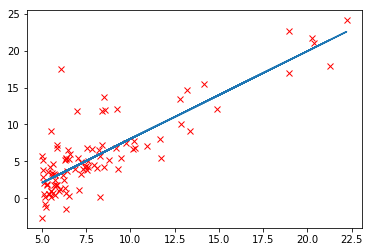

[[ 17.592        3.39377411]
 [  9.1302       2.6989513 ]
 [ 13.662        6.26719574]
 [ 11.854        4.45927249]
 [  6.8233       3.09515778]
 [ 11.886        6.10530106]
 [  4.3483       5.02381603]
 [ 12.           6.33818124]
 [  6.5987       3.84247408]
 [  3.8166       2.13452706]
 [  3.2522       2.91727646]
 [ 15.505       13.00234808]
 [  3.1551       2.94507415]
 [  7.2258       6.13572342]
 [  0.71618      2.8337641 ]
 [  3.5129       2.5220244 ]
 [  5.3048       3.69835561]
 [  0.56077      2.22460111]
 [  3.6518       3.77494837]
 [  5.3893       4.53992157]
 [  3.1386       3.48802377]
 [ 21.767       20.28701174]
 [  4.263        2.65409323]
 [  5.1875       3.65146939]
 [  3.0825       2.74333215]
 [ 22.638       18.70624211]
 [ 13.501       11.40845508]
 [  7.0467       9.17628906]
 [ 14.692       11.8236308 ]
 [ 24.147       22.59314585]
 [ -1.22         2.37050912]
 [  5.9966       3.96559516]
 [ 12.134        7.13763311]
 [  1.8495       3.13333486]
 [  6.5426    

In [31]:
ann = AdaptiveNeaurons(eta=0.01, n_iter=10)

# X_train_padded = np.column_stack((np.ones((m_train, 1)), X_train))
# X_test_padded = np.column_stack((np.ones((m_test, 1)), X_test))

theta = ann.fit(X_padded, y)

plt.plot(X,y,'rx', label='Training data')
plt.plot(X,X_padded.dot(theta),'-', label='Linear regression')
plt.show()

y_pred = X_padded.dot(theta)

print(np.column_stack((y, y_pred)))